In [1]:
import pandas as pd
demo = pd.read_csv("iris.csv")
X=demo.drop('variety',axis=1)
y=demo['variety']
demo.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


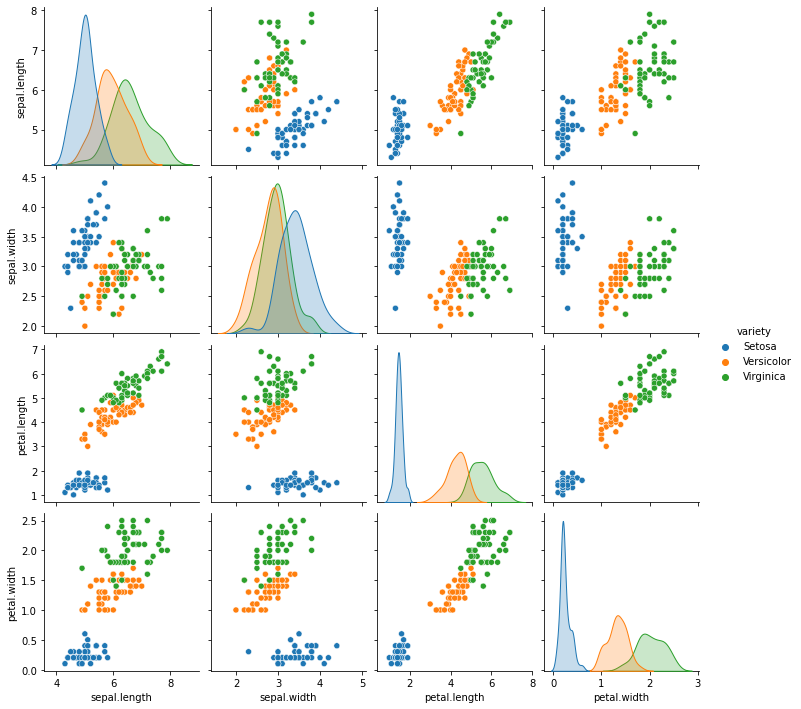

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(demo,diag_kind='kde',hue='variety')

In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=20)
lr=LogisticRegression()
sc=StandardScaler()
sc.fit(X_train)
scaledX_train = sc.transform(X_train)
scaledX_test = sc.transform(X_test)
lr.fit(scaledX_train,y_train)
print("What is the Testing Accuracy")
print(lr.score(scaledX_test,y_test))
print("What is the Training Accuracy")
print(lr.score(scaledX_train,y_train))

What is the Testing Accuracy
0.9333333333333333
What is the Training Accuracy
0.9583333333333334


In [4]:
X_test.head()

,sepal.length,sepal.width,petal.length,petal.width
47,4.6,3.2,1.4,0.2
73,6.1,2.8,4.7,1.2
74,6.4,2.9,4.3,1.3
129,7.2,3.0,5.8,1.6
67,5.8,2.7,4.1,1.0


In [5]:
predicted = lr.predict(scaledX_test)
print(predicted)
print(lr.predict_proba(scaledX_test))

['Setosa' 'Versicolor' 'Versicolor' 'Virginica' 'Versicolor' 'Versicolor'
 'Virginica' 'Setosa' 'Virginica' 'Setosa' 'Virginica' 'Versicolor'
 'Versicolor' 'Setosa' 'Setosa' 'Virginica' 'Setosa' 'Versicolor'
 'Virginica' 'Versicolor' 'Versicolor' 'Virginica' 'Virginica' 'Setosa'
 'Versicolor' 'Versicolor' 'Versicolor' 'Setosa' 'Virginica' 'Versicolor']
[[9.81762299e-01 1.82373804e-02 3.20864767e-07]
 [1.16082063e-02 8.98054235e-01 9.03375583e-02]
 [1.15867721e-02 9.09348215e-01 7.90650134e-02]
 [2.26748299e-04 3.49701780e-01 6.50071472e-01]
 [3.49637664e-02 9.44515038e-01 2.05211957e-02]
 [2.56066385e-02 9.00397355e-01 7.39960062e-02]
 [2.81398147e-05 2.48786221e-02 9.75093238e-01]
 [9.85911081e-01 1.40884546e-02 4.64237498e-07]
 [3.99045355e-05 1.35281256e-01 8.64678839e-01]
 [9.56079054e-01 4.39203777e-02 5.68249704e-07]
 [4.69318652e-04 1.61646799e-01 8.37883882e-01]
 [1.89911917e-03 7.90469227e-01 2.07631654e-01]
 [7.35272438e-04 5.50625931e-01 4.48638796e-01]
 [9.67292698e-01 3.27

In [6]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))

[[ 8  0  0]
 [ 0 11  0]
 [ 0  2  9]]
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00         8
  Versicolor       0.85      1.00      0.92        11
   Virginica       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



In [7]:
from sklearn.metrics import recall_score,precision_score,f1_score
print(precision_score(y_test,predicted,average=None))
print(recall_score(y_test,predicted,average=None))
print(f1_score(y_test,predicted,average=None))

[1.         0.84615385 1.        ]
[1.         1.         0.81818182]
[1.         0.91666667 0.9       ]


In [8]:
from sklearn.metrics import recall_score,precision_score,f1_score
print(precision_score(y_test,predicted,average='macro'))
print(recall_score(y_test,predicted,average='macro'))
print(f1_score(y_test,predicted,average='macro'))

0.9487179487179488
0.9393939393939394
0.9388888888888888


# Modelling using Decision Trees

In [33]:
#With Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
pipe = Pipeline((
("pt", PowerTransformer()),
#("scaler", StandardScaler()),
("dt", DecisionTreeClassifier(criterion = 'entropy',max_depth=3)),
))
pipe.fit(X_train,y_train)
print("Training Accuracy")
print(pipe.score(X_train,y_train))
print("Testing Accuracy")
print(pipe.score(X_test,y_test))

Training Accuracy
0.9833333333333333
Testing Accuracy
0.9333333333333333


Automatically created module for IPython interactive environment


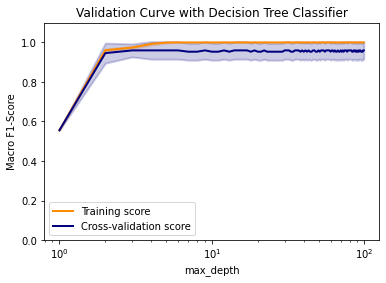

In [32]:
print(__doc__)
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve
X=demo.drop('variety',axis=1)
y=demo['variety']
param_range = np.arange(1,100)
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(), X, y, param_name="max_depth", param_range=param_range,
    scoring="f1_macro", n_jobs=1,cv=10)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Decision Tree Classifier")
plt.xlabel("max_depth")
plt.ylabel("Macro F1-Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()